#  טעינת הנתונים וסינון עמודות

In [1]:
import pandas as pd
import numpy as np

file_path = "C:\\Users\\saarc\\Desktop\\Wellbeing_and_lifestyle_data_Kaggle 2 - Wellbeing_and_lifestyle_data_Kaggle 2 (1).csv"
df = pd.read_csv(file_path)

# Removing whitespaces from column names
df.columns = df.columns.str.strip()

# Keeping the required columns only
df = df[['DAILY_STEPS', 'SLEEP_HOURS', 'TIME_FOR_PASSION']]


# חישוב והצגת סטטיסטיקות תיאוריות

In [ ]:
# Calculate mean, median, and mode for Daily Steps, Sleep Hours, Time for Passion
mean_values = df[['DAILY_STEPS', 'SLEEP_HOURS', 'TIME_FOR_PASSION']].mean()
median_values = df[['DAILY_STEPS', 'SLEEP_HOURS', 'TIME_FOR_PASSION']].median()
mode_values = df[['DAILY_STEPS', 'SLEEP_HOURS', 'TIME_FOR_PASSION']].mode().iloc[0]

# Create a dataframe for descriptive statistics
stats_df = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values
})

# Display descriptive statistics
print("Descriptive Statistics:")
print(stats_df)


#  זיהוי ערכים חריגים ואנומליות

In [ ]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column, threshold=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Function to detect anomalies (missing values)
def detect_anomalies_missing(data, column):
    anomalies = data[data.isnull().any(axis=1)]
    return anomalies

# Detect and display outliers and anomalies for Daily Steps, Sleep Hours, Time for Passion
steps_outliers_iqr = detect_outliers_iqr(df, 'DAILY_STEPS')
sleep_outliers_iqr = detect_outliers_iqr(df, 'SLEEP_HOURS')
passion_outliers_iqr = detect_outliers_iqr(df, 'TIME_FOR_PASSION')

steps_anomalies = detect_anomalies_missing(df, 'DAILY_STEPS')
sleep_anomalies = detect_anomalies_missing(df, 'SLEEP_HOURS')
passion_anomalies = detect_anomalies_missing(df, 'TIME_FOR_PASSION')

# Display the outliers and anomalies with correct row indices
if steps_outliers_iqr.empty:
    print("\nNo Daily Steps Outliers (IQR)")
else:
    print("\nDaily Steps Outliers (IQR):")
    print(steps_outliers_iqr.to_string(index=False))

if sleep_outliers_iqr.empty:
    print("\nNo Sleep Hours Outliers (IQR)")
else:
    print("\nSleep Hours Outliers (IQR):")
    print(sleep_outliers_iqr.to_string(index=False))

if passion_outliers_iqr.empty:
    print("\nNo Time for Passion Outliers (IQR)")
else:
    print("\nTime for Passion Outliers (IQR):")
    print(passion_outliers_iqr.to_string(index=False))

# Display the anomalies without row indices
if steps_anomalies.empty:
    print("\nNo Daily Steps Anomalies (Missing Values)")
else:
    print("\nDaily Steps Anomalies (Missing Values):")
    print(steps_anomalies.to_string(index=False))

if sleep_anomalies.empty:
    print("\nNo Sleep Hours Anomalies (Missing Values)")
else:
    print("\nSleep Hours Anomalies (Missing Values):")
    print(sleep_anomalies.to_string(index=False))

if passion_anomalies.empty:
    print("\nNo Time for Passion Anomalies (Missing Values)")
else:
    print("\nTime for Passion Anomalies (Missing Values):")
    print(passion_anomalies.to_string(index=False))


# הצגת היסטוגרמה ובוקספלוט עבור כל משתנה

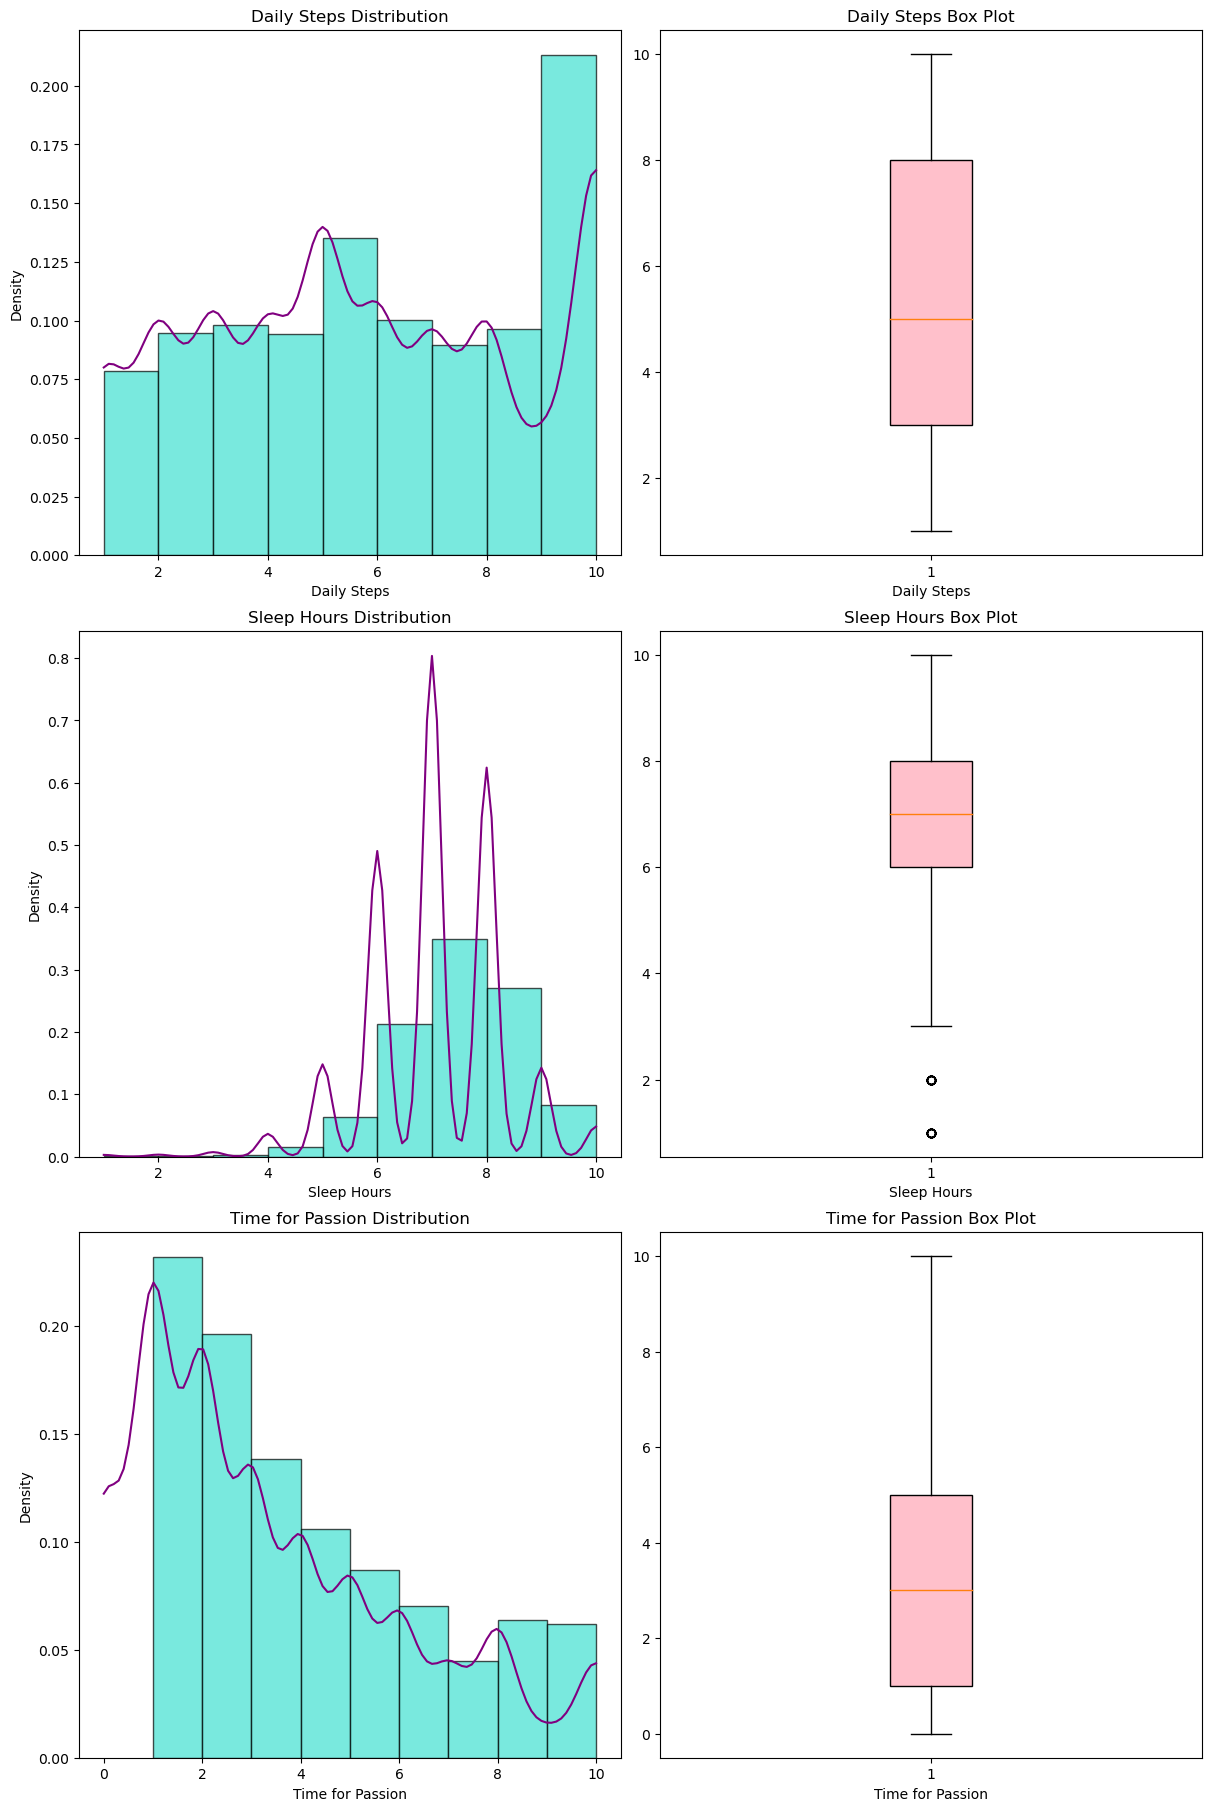

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

fig, axs = plt.subplots(3, 2, figsize=(12, 18), constrained_layout=True)

# Daily Steps Histogram
axs[0, 0].hist(df['DAILY_STEPS'], bins=range(1, 11), edgecolor='black', color='turquoise', alpha=0.7, density=True)
kde_steps = gaussian_kde(df['DAILY_STEPS'])
steps_range = np.linspace(df['DAILY_STEPS'].min(), df['DAILY_STEPS'].max(), 100)
axs[0, 0].plot(steps_range, kde_steps(steps_range), color='purple')
axs[0, 0].set_title('Daily Steps Distribution')
axs[0, 0].set_xlabel('Daily Steps')
axs[0, 0].set_ylabel('Density')

# Daily Steps Box Plot
axs[0, 1].boxplot(df['DAILY_STEPS'], vert=True, patch_artist=True, boxprops=dict(facecolor="pink"))
axs[0, 1].set_title('Daily Steps Box Plot')
axs[0, 1].set_xlabel('Daily Steps')

# Sleep Hours Histogram
axs[1, 0].hist(df['SLEEP_HOURS'], bins=range(1, 11), edgecolor='black', color='turquoise', alpha=0.7, density=True)
kde_sleep = gaussian_kde(df['SLEEP_HOURS'])
sleep_range = np.linspace(df['SLEEP_HOURS'].min(), df['SLEEP_HOURS'].max(), 100)
axs[1, 0].plot(sleep_range, kde_sleep(sleep_range), color='purple')
axs[1, 0].set_title('Sleep Hours Distribution')
axs[1, 0].set_xlabel('Sleep Hours')
axs[1, 0].set_ylabel('Density')

# Sleep Hours Box Plot
axs[1, 1].boxplot(df['SLEEP_HOURS'], vert=True, patch_artist=True, boxprops=dict(facecolor="pink"))
axs[1, 1].set_title('Sleep Hours Box Plot')
axs[1, 1].set_xlabel('Sleep Hours')

# Time for Passion Histogram
axs[2, 0].hist(df['TIME_FOR_PASSION'], bins=range(1, 11), edgecolor='black', color='turquoise', alpha=0.7, density=True)
kde_passion = gaussian_kde(df['TIME_FOR_PASSION'])
passion_range = np.linspace(df['TIME_FOR_PASSION'].min(), df['TIME_FOR_PASSION'].max(), 100)
axs[2, 0].plot(passion_range, kde_passion(passion_range), color='purple')
axs[2, 0].set_title('Time for Passion Distribution')
axs[2, 0].set_xlabel('Time for Passion')
axs[2, 0].set_ylabel('Density')

# Time for Passion Box Plot
axs[2, 1].boxplot(df['TIME_FOR_PASSION'], vert=True, patch_artist=True, boxprops=dict(facecolor="pink"))
axs[2, 1].set_title('Time for Passion Box Plot')
axs[2, 1].set_xlabel('Time for Passion')

plt.show()


# בדיקת השערות על תוחלות 

In [ ]:
from scipy import stats
from scipy.stats import chi2

alpha = 0.05

# Left side MU test on Sleep hours
mu_sleep = 7
t_stat_sleep, p_value_sleep = stats.ttest_1samp(df['SLEEP_HOURS'].dropna(), mu_sleep, alternative='less')
print(f"\nSleep Hours T-test (Left-sided): t-statistic = {t_stat_sleep:.4f}, p-value = {p_value_sleep:.4f}")
if p_value_sleep < alpha:
    print("Reject the null hypothesis (H0). The mean of Sleep Hours is significantly less than:", mu_sleep)
else:
    print("Fail to reject the null hypothesis (H0). The mean of Sleep Hours is not significantly less than:", mu_sleep)

# Right side MU test on Time for passion
mu_passion = 1.5
t_stat_passion, p_value_passion = stats.ttest_1samp(df['TIME_FOR_PASSION'].dropna(), mu_passion, alternative='greater')
print(f"\nTime for Passion T-test (Right-sided): t-statistic = {t_stat_passion:.4f}, p-value = {p_value_passion:.4f}")
if p_value_passion < alpha:
    print("Reject the null hypothesis (H0). The mean of Time for Passion is significantly greater than:", mu_passion)
else:
    print("Fail to reject the null hypothesis (H0). The mean of Time for Passion is not significantly greater than:", mu_passion)

# 2 sides MU test on daily steps
mu_steps = 10
t_stat_steps, p_value_steps = stats.ttest_1samp(df['DAILY_STEPS'].dropna(), mu_steps)
print(f"\nDaily Steps T-test (Two-sided): t-statistic = {t_stat_steps:.4f}, p-value = {p_value_steps:.4f}")
if p_value_steps < alpha:
    print("Reject the null hypothesis (H0). The mean of Daily Steps is significantly different from:", mu_steps)
else:
    print("Fail to reject the null hypothesis (H0). The mean of Daily Steps is not significantly different from:", mu_steps)


# בדיקת השערות על השונות

In [ ]:
from scipy import stats
from scipy.stats import chi2

alpha = 0.05

# Hypothesis Testing on Variance
sleep_hours = df['SLEEP_HOURS']
population_variance = np.var(sleep_hours, ddof=1)
sample = sleep_hours.sample(100, random_state=42)
sample_variance = np.var(sample, ddof=1)
n = len(sample)
chi_square_statistic = (n - 1) * sample_variance / population_variance
p_value_sleep = chi2.sf(chi_square_statistic, df=n-1)
print(f"\nChi-Square Test: chi-square statistic = {chi_square_statistic:.4f}, p_value_sleep = {p_value_sleep:.4f}")

if p_value_sleep < alpha:
    print("Reject the null hypothesis: The variance in the sample is different from the variance in the overall population.")
else:
    print("Fail to reject the null hypothesis: The variance in the sample is not different from the variance in the overall population.")

# דיסקרטיזציה ובדיקת השערות על פרופורציות

In [ ]:
# Discretization of 'DAILY_STEPS'
bins = [0, 2, 5, 7, 9, np.inf]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
df['STEPS_CATEGORY'] = pd.cut(df['DAILY_STEPS'], bins=bins, labels=labels)

# Count the values of the new categories
print("\n", df['STEPS_CATEGORY'].value_counts())

# Proportion test
observed_proportion = df['STEPS_CATEGORY'].isin(['Moderate', 'High', 'Very High']).mean()
n = len(df)
count = observed_proportion * n
expected_proportion = 0.50

category_proportions = df['STEPS_CATEGORY'].value_counts(normalize=True)
print("\nProportions of each STEPS_CATEGORY:")
print(category_proportions)

# Create proportion test
from statsmodels.stats.proportion import proportions_ztest

z_stat, p_value = proportions_ztest(count, n, expected_proportion)

print(f"\nObserved Proportion: {observed_proportion:.2f}")
print(f"Z-statistic: {z_stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis: The proportion of people with 'Moderate' or higher daily steps is significantly different from 50%.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the proportion of people with 'Moderate' or higher daily steps compared to 50%.")


# מבחן השערות על שיוויון תוחלות 

In [ ]:
# Split SLEEP_HOURS to 2 groups- less than 7 hours and more than 7 hours
df['SLEEP_CATEGORY'] = pd.cut(df['SLEEP_HOURS'], bins=[0, 7, np.inf], labels=['Less than 7 hours', 'More than 7 hours'])

print("\nSLEEP_CATEGORY distribution:")
print(df['SLEEP_CATEGORY'].value_counts())

# Split the data into groups based on 'SLEEP_CATEGORY'
grouped = df.groupby('SLEEP_CATEGORY')['DAILY_STEPS']
group_means = grouped.mean()
group_stds = grouped.std()
print("\nMean Daily Steps by SLEEP_CATEGORY:")
print(group_means)
print("\nStandard Deviation of Daily Steps by SLEEP_CATEGORY:")
print(group_stds)

# Compare the mean of daily steps count between the groups
group1 = df[df['SLEEP_CATEGORY'] == 'Less than 7 hours']['DAILY_STEPS'].dropna()
group2 = df[df['SLEEP_CATEGORY'] == 'More than 7 hours']['DAILY_STEPS'].dropna()

t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
print(f"\nT-test between 'Less than 7 hours' and 'More than 7 hours' sleep categories:")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in mean daily steps between the two sleep categories.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in mean daily steps between the two sleep categories.")


# מבחן לטיב ההתאמה

In [ ]:
sleep_hours = df['SLEEP_HOURS'].dropna()

# create categories for SLEEP_HOURS
categories = pd.cut(sleep_hours, bins=[0, 5, 7, float('inf')], labels=['Less than 5 hours', '5-7 hours', 'More than 7 hours'])
observed_frequencies = categories.value_counts()

# Different expected theoretical distribution
expected_frequencies = np.full_like(observed_frequencies, fill_value=len(sleep_hours) / len(observed_frequencies))
chi2_stat, p_value = stats.chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

# present chi square test results
print(f"\nChi-Square Test for Goodness of Fit:")
print(f"Chi2 Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print("\nObserved Frequencies:")
print(observed_frequencies)
print("\nExpected Frequencies:")
print(expected_frequencies)

if p_value < alpha:
    print("Reject the null hypothesis: The data does not follow the expected distribution.")
else:
    print("Fail to reject the null hypothesis: The data follows the expected distribution.")


# מבחן לאי תלות 

In [ ]:
# discretization of 'TIME_FOR_PASSION' and 'SLEEP_HOURS'
df['SLEEP_CATEGORY'] = pd.cut(df['SLEEP_HOURS'], bins=[0, 5, 7, float('inf')], labels=['Less than 5 hours', '5-7 hours', 'More than 7 hours'])
df['PASSION_CATEGORY'] = pd.cut(df['TIME_FOR_PASSION'], bins=[0, 1, 2, float('inf')], labels=['Less than 1 hour', '1-2 hours', 'More than 2 hours'])

sleep_distribution = df['SLEEP_CATEGORY'].value_counts()
passion_distribution = df['PASSION_CATEGORY'].value_counts()

print("\nSLEEP_CATEGORY distribution:")
print(sleep_distribution)

print("\nPASSION_CATEGORY distribution:")
print(passion_distribution)

# Create incidence table (contingency table)
contingency_table = pd.crosstab(df['SLEEP_CATEGORY'], df['PASSION_CATEGORY'])

# perform Chi square test to check dependence between variables
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Chi square test results
print("\nChi-Square Test results:")
print(f"Chi2 Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4e}")
print(f"Degrees of Freedom: {dof}")

# Printing the expected frequencies table in a formatted manner
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
print(expected_df)

if p_value < alpha:
    print("Fail to reject the null hypothesis: There is a significant association between sleep hours and time for passion.")
else:
    print("Reject the null hypothesis: There is no significant association between sleep hours and time for passion.")
